# 3장. 사이킷런을 타고 떠나는 머신 러닝 분류 모델 투어

**아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/python-machine-learning-book-2nd-edition/blob/master/code/ch03/ch03.ipynb"><img src="https://jupyter.org/assets/main-logo.svg" width="28" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/python-machine-learning-book-2nd-edition/blob/master/code/ch03/ch03.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

`watermark`는 주피터 노트북에 사용하는 파이썬 패키지를 출력하기 위한 유틸리티입니다. `watermark` 패키지를 설치하려면 다음 셀의 주석을 제거한 뒤 실행하세요.

In [ ]:
#!pip install watermark

In [1]:
%load_ext watermark
%watermark -u -d -p numpy,pandas,matplotlib,sklearn

last updated: 2019-04-25 

numpy 1.16.3
pandas 0.24.2
matplotlib 3.0.3
sklearn 0.20.3


## 3.1 분류 알고리즘 선택
머신러닝 알고리즘을 훈련 하기 위한 다섯 가지 주요 단계
1. 특성을 선택하고 훈련 샘플을 모음
2. 성능 지표를 선택
3. 분류 모델과 최적화 알고리즘을 선택
4. 모델의 성능 평가
5. 알고리즘 튜닝

## 3.2 사이킷런 첫걸음 : 퍼셉트론 훈련

사이킷런에서 붓꽃 데이터셋을 적재합니다. 세 번째 열은 꽃잎의 길이이고 네 번째 열은 꽃잎의 너비입니다. 클래스는 이미 정수 레이블로 변환되어 있습니다. 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica 입니다.

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y)) 
# np.unique : iris.target에 저장된 3개의 고유한 클래스 레이블 반환

클래스 레이블: [0 1 2]


70%는 훈련 데이터 30%는 테스트 데이터로 분할합니다:

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y) 
# stratify=y : 계층화

In [4]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))
# np.bincount : 고유한 값 등장 횟수

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


특성을 표준화합니다:

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 퍼셉트론 모델 훈련
사이킷런의 알고리즘은 대부준 기본적으로 OvR 방식을 사용하여 다중 분류를 지원

2장의 `plot_decision_region` 함수를 다시 사용하겠습니다:

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 14


In [8]:
from sklearn.metrics import accuracy_score

print('정확도: %.2f' % accuracy_score(y_test, y_pred))

정확도: 0.69


In [9]:
print('정확도: %.2f' % ppn.score(X_test_std, y_test))

정확도: 0.69


In [10]:
# 새로운 퍼셉트론 모델의 결정 경계를 그려 시각화
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

표준화된 훈련 데이터를 사용하여 퍼셉트론 모델을 훈련합니다:

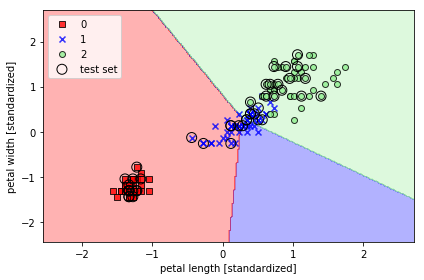

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
# 선형 결정 경계로 완벽하게 분류되지 못함

## 3.3 로지스틱 회귀를 사용한 클래스 확률 모델링

### 로지스틱 회귀의 이해와 조건부 확률
- 오즈 : 특정 이벤트가 발생할 확률
- 오즈비 : $p/(1-p)$
- $logit(p)= log(p/(1-p))$ : 로짓함수 / 0과 1사이의 입력 값을 받아 실수 범위 값으로 변환
- $logit(P(y=1|x))=w^Tx$
- logit 함수를 뒤집은 로지스틱 시그모이드 함수를 사용
- $ϕ(z)=1/(1+e^{-z})$

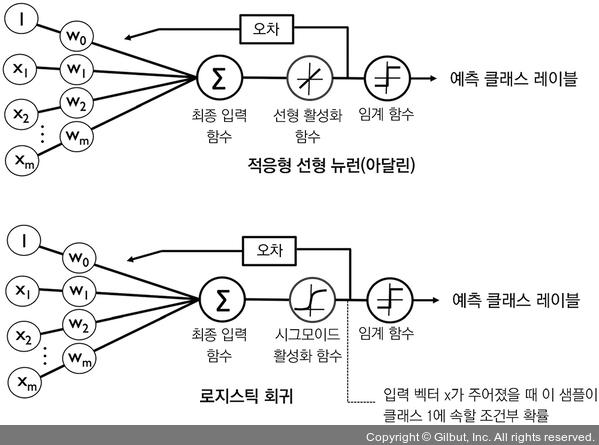

로지스틱 회귀는 클래스 레이블을 예측하는 것 외에 클래스에 소속될 확률을 추정할 수도 있음 

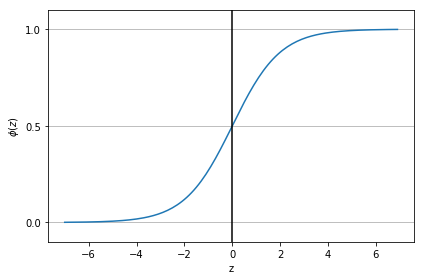

In [12]:
# 시그모이드 함수
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

### 로지스틱 비용 함수의 가중치 학습

제곱 오차합 함수![image.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FV9v6d%2FbtqBHx8EpRb%2FKTXU1r5kKQewxsoV8xwfAk%2Fimg.png)

로지스틱 모델의 최대화기능 L(likelihood)
![image.png](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdZCtV1%2FbtqBHzk7g0D%2FqyoFasVZDkZo9dqj52MBd1%2Fimg.png)

로그 가능도 함수
- 실전에서는 가능도가 낮을 때 일어나는 언더플로를 미연에 방지할 수 있고, 계수의 곱을 계수의 합으로 바꿔쓸 수 있는 자연로그를 최대화하는 것이 더 쉽습니다. 이 함수를 로그 가능도 함수라고 부릅니다.
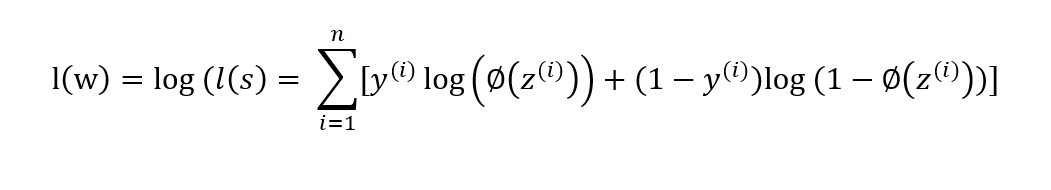

비용함수로 표현한 로그 기능도 함수
- 경사 상승법 같은 최적화 알고리즘을 통해 로그 기능도 함수를 최대화하거나 로그 기능도 함수를 다시 비용함수인 J로 표현해 경사하강법을 이용해 최소화할 수도 있습니다.
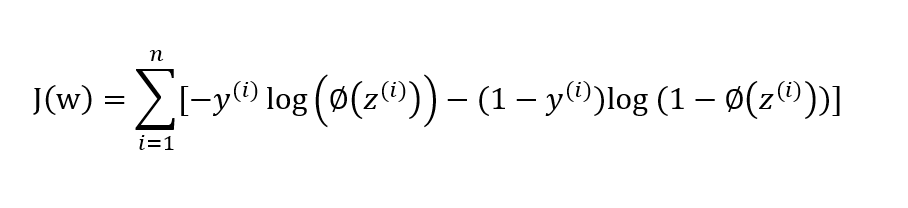

이 비용함수를 이해하기 위해서 샘플이 하나일 때 비용을 계산해보도록 하겠습니다. 
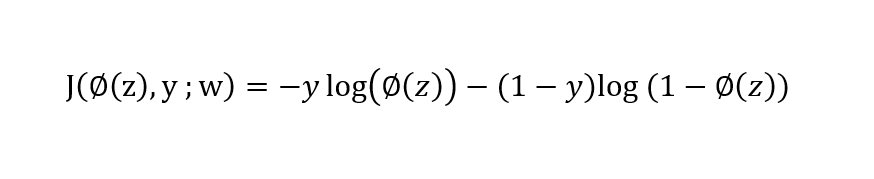

이 식을 보면 y = 0일 때 첫째 항이 0이 되고, y = 1일 때는 둘째 항이 0이 됩니다.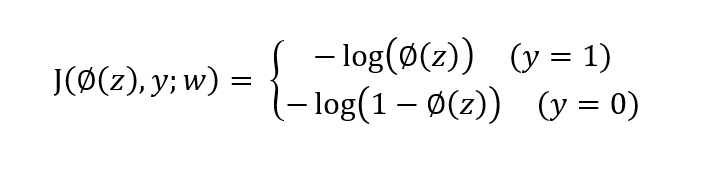

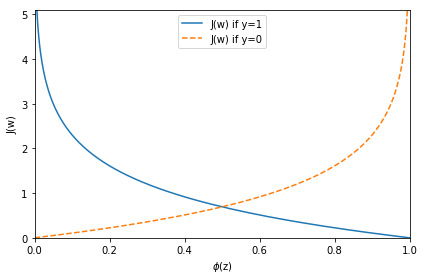

In [13]:
# 분류비용 시각화
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# x축 : 시그모이드 활성화 값 (0에서 1까지)
# y축 : 로지스틱 비용
# 잘못된 예측에 더 큰 비용을 부여

### 아달린 구현을 로지스틱 회귀 알고리즘으로 변경
- 아달린 구현에서 비용함수 J를 새로운 비용 함수로 바꿈
    - 에포크마다 모든 훈련 샘플을 분류하는 비용 계산
    - 선형 활성화 함수를 시그모이드 활성화로 바꿈
    - 임계 함수가 클래스 레이블 -1과 1이 아닌 0과 1을 반환하도록 변경

In [14]:
class LogisticRegressionGD(object):
    """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 오차 제곱합 대신 로지스틱 비용을 계산합니다.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 다음과 동일합니다.
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

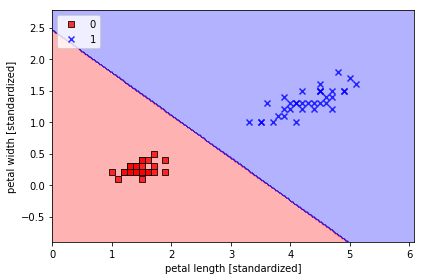

In [15]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### 사이킷런을 사용해 로지스틱 회귀 모델 훈련하기

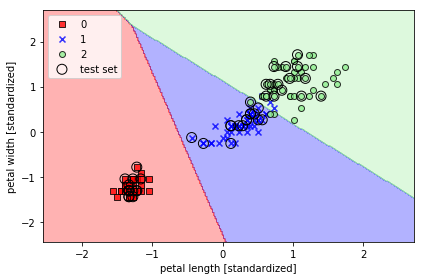

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', multi_class='auto', C=100.0, random_state=1)
# solver='liblinear' -> solver='lbfgs'로 디폴트 값이 변경 
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
lr.predict_proba(X_test_std[:3, :]) # 클래스에 속할 확률 계산

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [18]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [19]:
# 가장 큰 값의 열이 예측 클래스 레이블이 됨 (argmax 사용)
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [20]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [21]:
# 사이킷런은 입력 데이터로 2차원 배열을 사용
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

### 규제를 사용해 과대적합 피하기
- 과대적합 : 모델이 훈련 데이터로는 잘 동작하지만 본 적 없는 데이터로는 잘 일반화되지 않는 현상
- 과소적합 : 훈련 데이터에 있는 패턴을 감지할 정도로 충분히 모델이 복잡하지 않음


- 좋은 편향-분산 트레이드오프를 찾는 한 가지 방법은 **규제**를 사용하여 모델의 복잡도를 조정하는 것
- 규제 : 공선성을 다루거나 데이터에 잡음을 제거하여 과대적합을 방지할 수 있는 방법 (과도한 파라미터 값을 제한하기 위해 추가적인 정보를 주입)


L2 규제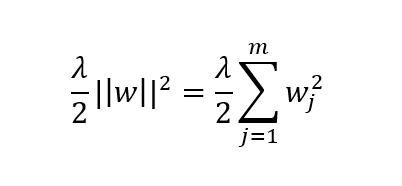

로지스틱 회귀에 L2 규제 적용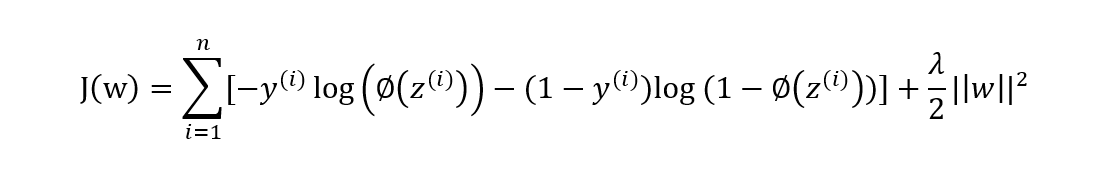

LogisticRegression의 C는 규제 하이퍼파라미터 $λ$의 역수 (C를 감소하면 규제강도 $λ$ 증가)

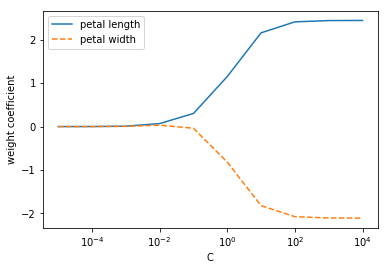

In [22]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c, random_state=1)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()
# 매개변수 C가 감소하면 가중치 절댓값이 줄어 규제 강도가 증가함

## 3.4 서포트 벡터 머신을 사용한 최대 마진 분류
- SVM : 퍼셉트론의 확장으로 마진을 최대화하여 분류
- 마진 : 클래스를 구분하는 초평면과 이 초평면에 가장 가까운 훈련 샘플(서포트 벡터) 사이의 거리

### 최대 마진
- 큰 마진 : 알반화 오차가 낮아지는 경향이 있음
- 작은 마진 : 과대적합되기 쉬움


w의 길이로 정규화된 식과 결과식
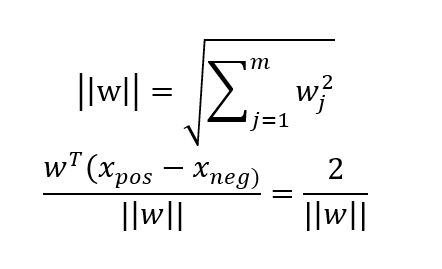결과식의 좌변은 양성 쪽 결정 경계와 음성 쪽 결정 경계의 거리로, 최대화하려는 마진(margin)이다.

SVM 제약조건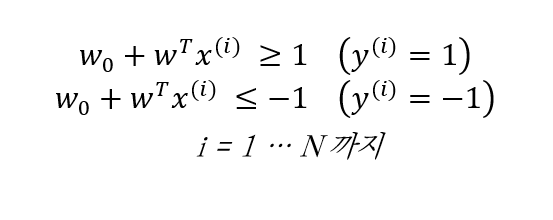 SVM의 목적 함수는 샘플이 정확하게 분류된다는 조건 하에 우변을 최대화함으로써 마진을 최대화하는 것

모든 음성 샘플은 음성 쪽 초평면 너머에 있어야 하고 양성 샘플은 양성 쪽 초평면 너머에 있어야 한다.

### 슬랙 변수를 사용하여 비선형 분류 문제 다루기
- 슬랙변수 $ξ$ (소프트 마진 분류) : 선형적으로 구분되지 않는 데이터에서 선형 제약 조건을 완화할 필요가 있기 때문에 도입된 변수


선형 제약 조건에 슬랙 변수 적용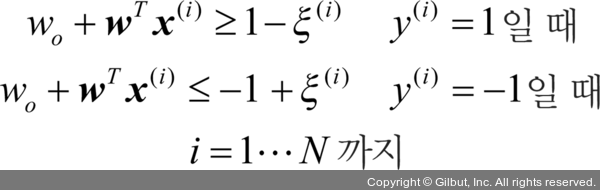

제약 조건 아래에서 최소화할 새로운 목적함수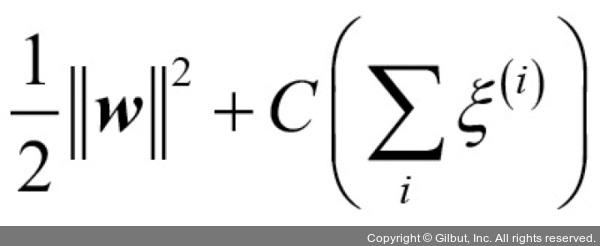

- C값이 크면 오차에 더 엄격해져 오차에 대한 비용이 커지고, 작으면 분류 오차에 덜 엄격해져 비용이 작아진다. 
- 매개변수 C를 사용하여 마진 폭을 제어할 수 있다.

C값에 따른 결정 경계와 마진
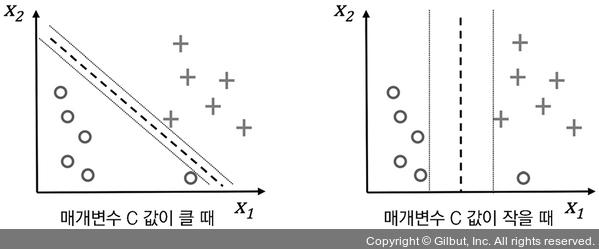

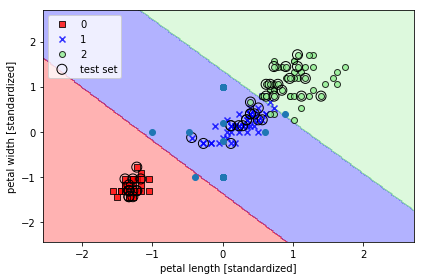

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0, :], svm.dual_coef_[1, :])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<로지스틱 회귀 vs SVM>
- 로지스틱 회귀는 훈련 데이터의 조건부 가능도를 최대화하기 때문에 SVM보다 이상치에 민감하다.
- SVM은 결정 경계에 가장 가까운 포인트(서포트 벡터)에 대부분 관심을 둔다.
- 로지스틱 회귀는 모델이 간단하고 구현하기가 더 쉬운 장점이 있다.
- 로지스틱 회귀 모델은 업데이트가 용이하여 스트리밍 데이터를 다룰 때 적합

In [24]:
svm.coef_

array([[-1.28108835, -1.08908074],
       [-0.68216416, -0.56900015],
       [-2.20580665, -1.9370517 ]])

In [25]:
svm.dual_coef_, svm.dual_coef_.shape

(array([[ 0.88134491,  0.60379849, -1.        , -0.        , -0.        ,
         -0.        , -0.        , -0.4851434 , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.39455455],
        [ 0.39455455,  0.        ,  0.        ,  1.        ,  0.19375927,
          1.        ,  1.        ,  0.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         -1.        , -1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -0.19375927, -1.        ,
         -1.        ]]), (2, 26))

### 사이킷런의 다른 구현
데이터셋이 너무 커서 컴퓨터 메모리 용량에 맞지 않는 경우 사이킷런에 대한 대안으로 SGDClassifier 사용

SGDClassifier은 partial_fit 메서드를 사용하여 온라인 학습을 지원

In [26]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron') # 기본 매개변수를 사용한 퍼셉트론
lr = SGDClassifier(loss='log') # 로지스틱 회귀
svm = SGDClassifier(loss='hinge') # SVM의 확률적 경사 하강법

## 3.5 커널 SVM을 사용하여 비선형 문제 풀기

### 선형적으로 구분되지 않는 데이터를 위한 커널 방법

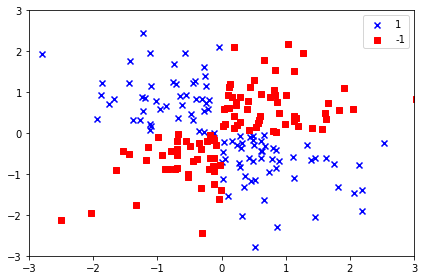

In [27]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

선형적으로 구분 되지 않는 데이터를 다루는 **커널 방법**의 기본 아이디어는 매핑 함수 $ϕ$를 사용하여 원본 특성의 비선형 조합을 선형적으로 구분되는 고차원 공간에 투영하는 것
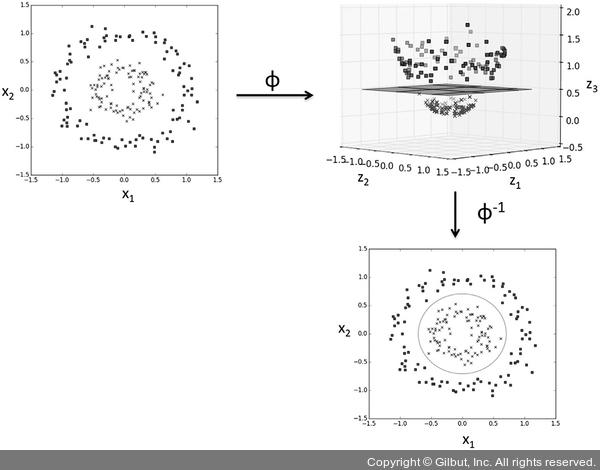
고차원 공간에서 결정경계를 그리고 원본 특성 공간으로 되돌리면 비선형 형태의 결정 경계를 확인할 수 있다. 

### 커널 기법을 사용해 고차원 공간에서 분할 초평면 찾기

- SVM으로 비선형 문제를 풀기 위해서 매핑함수 $ϕ$를 사용해서 훈련 데이터를 고차원으로 변환
- 고차원 특성 공간에서 데이터를 분류하는 선형 SVM 모델을 훈련
- 같은 매핑 함수와 선형 모델로 분류

- 이 방법의 문제점은 새로운 특성을 만드는 계산에서 비용이 너무 비싸다. 
- **커널 기법** 사용

방사 기저 함수 (가우시안 커널) / 가장 많이 사용되는 커널이다
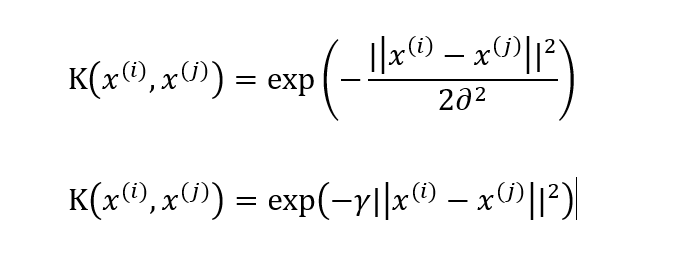


- 커널이란 용어는 샘플 간의 유사도 함수로 해석할 수 있다. 
- 식에 쓰인 음수 부호가 거리 측정을 유사도 점수로 바꾸는 역할을 함
- 유사도 점수는 0과 1사이의 값을 가짐 

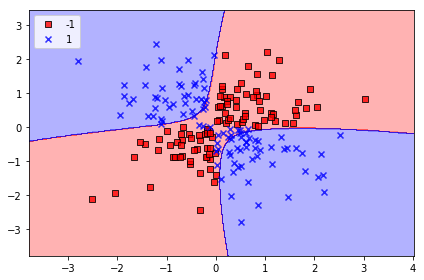

In [28]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
# gamma=0.10 : 가우시안 구의 크기를 제한하는 매개변수 
# 값이 커지면 서포트 벡터의 영향이나 범위가 줄어들고 결정 경계는 더욱 샘플에 가까워지고 구불구불해짐

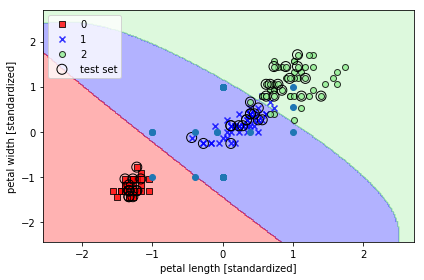

In [29]:
# gamma 작을 때 (과소적합)
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0,:], svm.dual_coef_[1,:])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

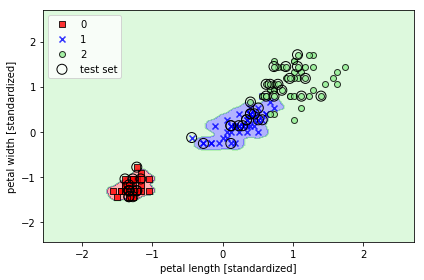

In [30]:
# gamma 클 때 (과대적합)
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 3.6 결정 트리 학습
- **결정트리** : 훈련 데이터의 특성을 기반으로 샘플의 클래스 레이블을 추정할 수 있는 질문을 학습
- 결정 알고리즘을 사용하면 트리의 루트에서 시작해서 **정보 이득(Information Gain, IG)**이 최대가 되는 특성으로 데이터를 나눈다.
- 반복을 통해서 **리프 노드**가 순수해질 때까지 모든 **자식 노드**에서 이 분할 작업을 반복
- 깊은 트리가 만들어져서 오버피팅을 방지하기 위해서 **가지치기**(pruning) 적용

### 정보 이득 최대화 : 자원을 최대로 활용
- **목적 함수** : 각 분할에서 정보 이득을 최대화


정보이득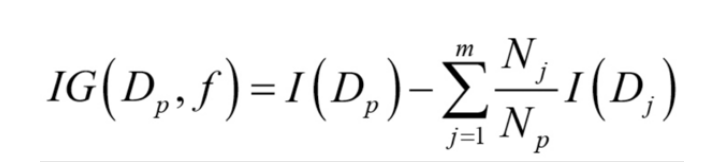

- f : 분할에 사용할 특성, 즉 질문
- Dp와 Dj는 부모와 j번째 자식 노드의 데이터
- I : 불순도(impurity)
- Np : 부모 노드에 있는 전체 샘플 개수. 
- Nj : j번째 자식 노드의 샘플 개수. 

정보 이득은 단순히 부모 노드의 불순도와 자식 노드의 불순도 합의 차이 (자식 노드의 불순도가 낮을수록 정보 이득이 커진다.)

정보이득 - 결정 트리
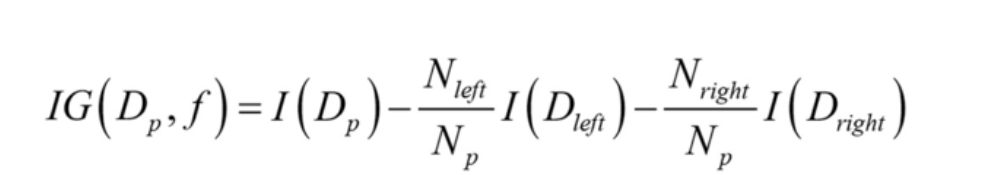
이진 결정 트리에 중요한 역할을 하는 불순도 지표(분할 조건)은 대표적으로 **지니 불순도(Gini impurity), 엔트로피(entropy, IH), 분류 오차(classification error, IE)**이다.

#### 샘플이 있는 모든 클래스에 대한 엔트로피 정의
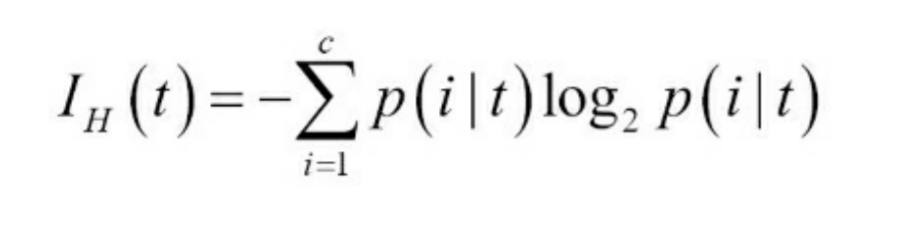
- $p(i|t)$ : 특정 노드 t에서 클래서 i에 속한 샘플 비율
- 한 노드의 모든 샘플이 같은 클래스이면 엔트로피는 0
- 클래스 분포가 균등할 때 엔트로피가 최대

#### 지니 불순도
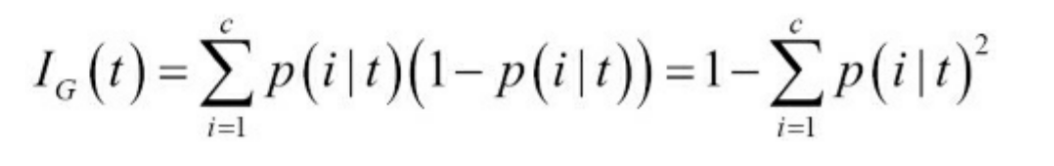
- 지니 불순도 : 잘못 분류될 확률을 최소화하기 위한 기준
- 클래스가 완벽하게 섞여 있을 때 최대 (엔트로피와 비슷함)
- 불순도 조건을 바꾸어 트리를 평가하는 것보다 가지치기 수준을 바꾸면서 튜닝하는 것이 훨씬 좋음

#### 분류 오차
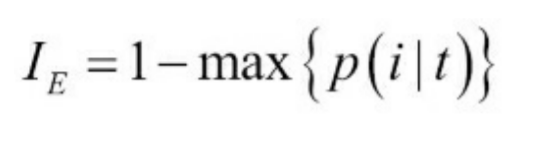
- 가지치기에는 좋은 기준이지만 노드의 클래스 확률 변화에 덜 민감하여 결정트리를 구성하는 데는 권장되지 않음

예시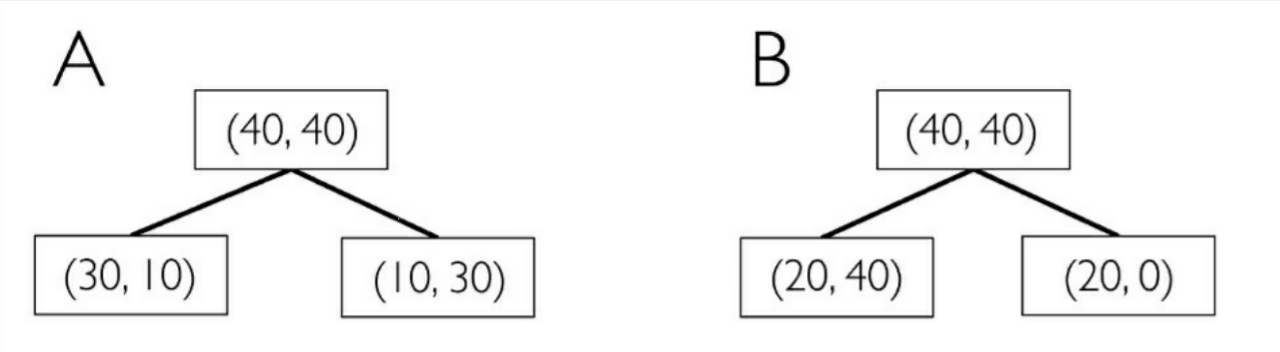

분류 오차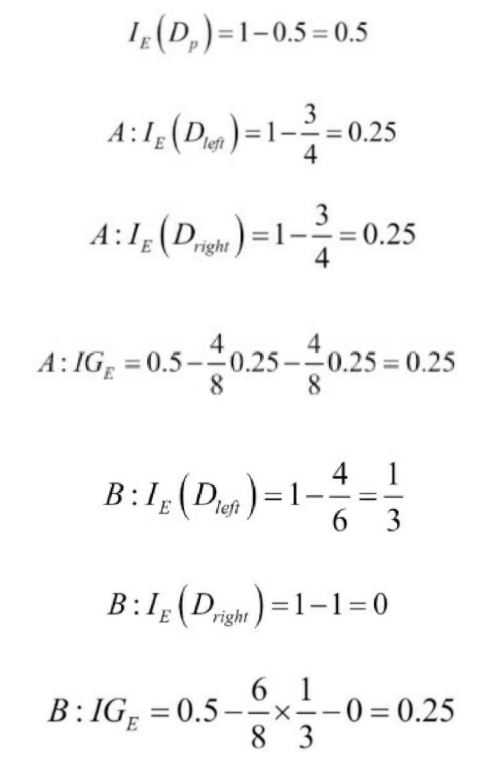 두 경우의 정보 이득이 동일



지니 불순도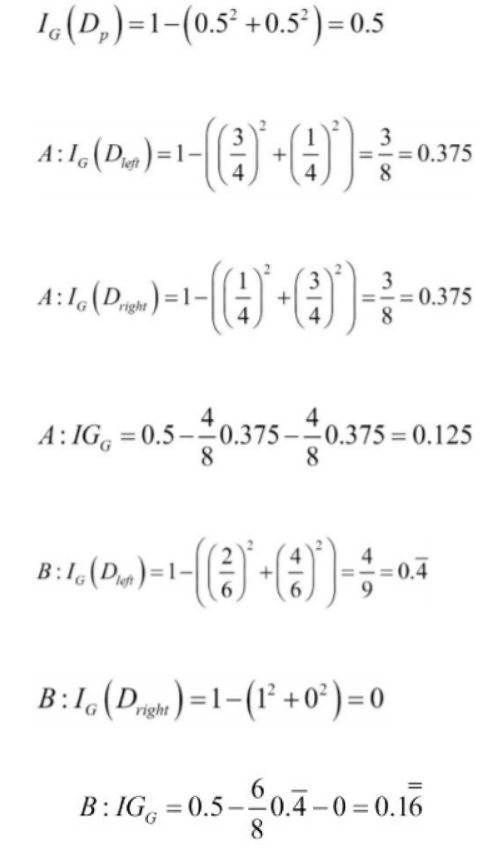시나리오 A(IG = 0.125)보다 시나리오 B(IG = 0.16)이 더 순수

엔트로피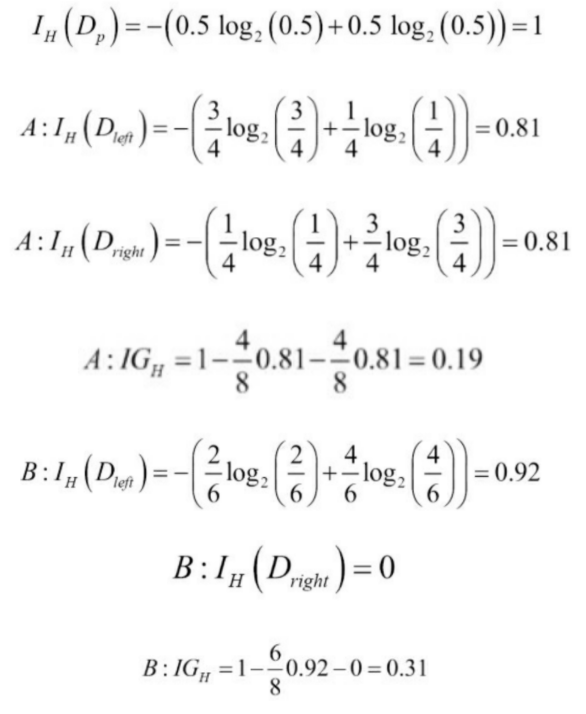시나리오 A(IG=0.19)보다 시나리오 B(IG = 0.31)을 더 선호

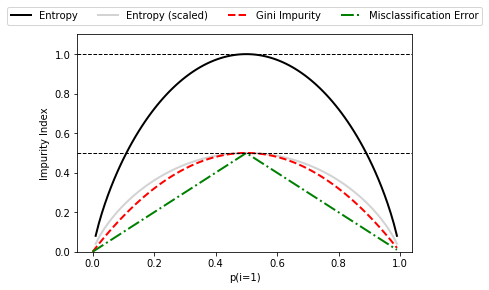

In [31]:
# 3개의 불순도 기준을 시각적으로 비교
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

### 결정 트리 만들기

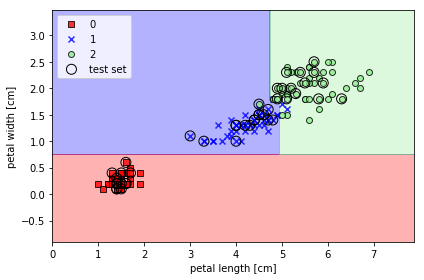

In [32]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [33]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

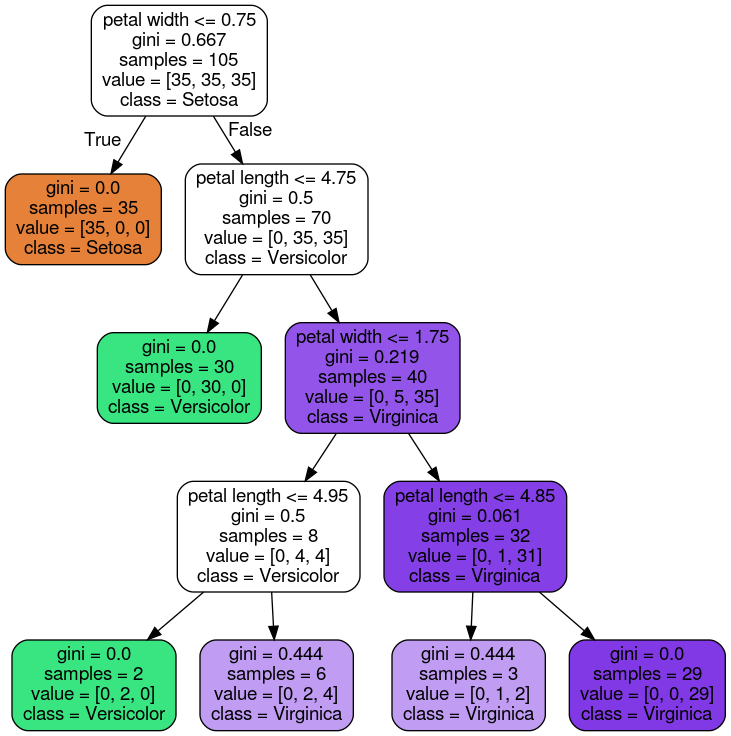

### 랜덤 포레스트로 여러 개의 결정 트리 연결하기
- 랜덤 포레스트 : 결정 트리의 앙상블 (여러 개의 결정 트리를 평균)
- 개개의 트리는 분산이 높은 문제가 있지만 **앙상블**은 견고한 모델을 만들어 일반화 성능을 높이고 과대적합의 위험을 줄임


1. n개의 랜덤한 부트스트랩(bootstrap)샘플을 뽑음 (중복허용하며 랜덤하게 n개 샘플 선택)
    - 부트스트랩 : 모집단의 성질에 대해 표본을 통해 추정할 수 있는 것처럼, 표본의 성질에 대해서도 재표집(resampling)을 통해 추정할 수 있다는 것이다. 즉 주어진 표본(샘플)에 대해서, 그 샘플에서 또 다시 샘플(재표본)을 여러번 추출하여 표본의 평균이나 분산 등이 어떤 분포를 가지는가를 알아낼 수 있다.
    
    
2. 부트스트랩 샘플에서 결정 트리를 학습. 그리고 각 노드에 대해서 아래와 같이 적용
    1. 중복을 허용하지 않고 랜덤하게 d개의 특성을 선택
    2. 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 이용해 노드를 분할 
    
    (모든 특성을 평가하는 것이 아닌 랜덤하게 선택된 일부 특성만 사용)
    
    
3. 단계 1과 2를 k번 반복
4. 각 트리의 예측을 모아서 다수결 투표(majority voting)로 클래스 레이블을 할당



- 앙상블 모델이 개별 결정 트리가 만드는 잡음이 거의 없이 안정되어있어 가지치기를 할 필요가 없음
- 트리 개수가 많을수록 계산 비용이 증가하고 그만큼 분류기의 성능이 좋아진다.

- 부트스트랩 샘플 크기가 작아지면 특정 훈련 샘플이 부트스트랩 샘플에 포함될 확률이 낮아 개별 트리의 다양성이 증가하고, 따라서 랜덤 포레스트의 무작위성이 증가하고 오버피팅 영향이 줄어듬
- 일반적으로 부트스트랩 샘플이 작을수록 훈련 성능과 테스트 성능 사이의 격차가 작아져 성능이 줄어든다.
- 부트스트랩 크기가 증가하면 부트스트랩과 개별 결정 트리가 서로 비슷해져 오버피팅될 가능성이 높아진다.

- 사이킷런의 RandomForestClassifier을 포함한 대부분의 라이브러리에서는 부트스트랩 샘플 크기를 원본 훈련 세트의 샘플 개수와 같게 한다. 
- 이 방법은 균형잡힌 트레이드 오프를 얻을 수 있다. 
- 분할할 때 사용할 특성 개수 d는 전체 특성 개수보다 작게 한다. 
- 여러 라이브러리에서 사용하는 적당한 기본값은 $d = \sqrt{m}$이다. d : 분할할 때 사용할 특성 개수, m : 훈련 세트에 있는 특성 개수

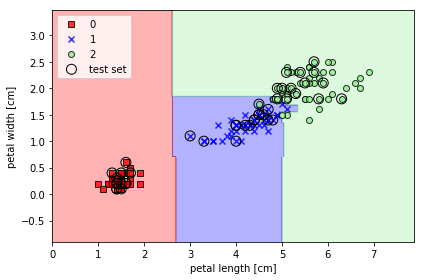

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2) # n_estimators=25 : 25개 결정 트리
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 3.7 K-최근접 이웃: 게으른 학습 알고리즘
KNN 알고리즘 : 훈련 데이터에서 판별 함수를 학습하는 게 아니라 훈련 데이터셋을 메모리에 저장하며 분류
1. 숫자 k와 거리 측정 기준을 선택
2. 분류하려는 샘플에서 k개의 최근접 이웃을 찾기
3. 다수결 투표를 통해 클래스 레이블을 할당


**다수결 투표가 동일할 경우** 사이킷런의 KNN 구현은 **샘플에 더 가까운 이웃**을 예측으로 선택한다. **이웃들의 거리가 같다면** 훈련 데이터 셋에서 **먼저 나타난 샘플의 클래스 레이블**을 선택한다.

적절한 k를 선택하는 것이 중요


- 모수 모델 : 새로운 데이터 포인트를 분류할 수 있는 함수를 학습하기 위해 훈련 데이터셋에서 모델 파라미터를 추정
    - 훈련이 끝나면 원본 훈련 데이터셋이 더 이상 필요하지 않음
    - 퍼셉트론, 로지스틱 회귀, 선형 SVM
- 비모수 모델 : 고정된 개수의 파라미터로 설명될 수 없고 훈련 데이터가 늘어남에 따라 파라미터 개수도 늘어남
    - 결정 트리, 랜덤 포레스트, 커널 SVM, KNN
- KNN은 인스턴스 기반 모델로 훈련 데이터 셋을 메모리에 저장함 (학습 과정에 비용이 들지는 않음)




<메모리 기반의 분류기 장단점>
- 장점
    - 새로운 데이터에 즉시 적응할 수 있다.
- 단점
    - 새로운 샘플을 분류하는 계산이 상당히 복잡하다.
    - 데이터의 차원이 적고 알고리즘이 효율적인 구조가 아니라면 계산의 복잡도는 샘플 개수에 선형적으로 증가한다.
    - 훈련 단계가 없어 훈련 샘플을 버릴 수 없어 저장공간에 문제가 있을 수 있다.

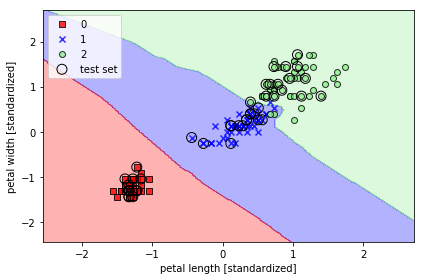

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- 모델 해석이 중요 -> 결정트리
- 확률적 경사 하강법을 사용한 온라인 학습, 특정 이벤트 확률 예측 -> 로지스틱 회귀
- 비선형 문제 확장가능 -> SVM
- 실전 여러 종류 문제 적용 -> 앙상블 모델
- 모델 훈련 없이 예측 -> KNN 